# Analysis of products. 

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import helper as hlp

In [10]:
products = pd.read_csv('data_edit/PRODUCTS.csv')

In [11]:
forecast = pd.read_csv('data_edit/FORECAST.csv',parse_dates=['date']) # Forecast
past_forecast = pd.read_csv('data_edit/PAST_FORECAST.csv',parse_dates=['date']) # Previous Forecast
lead_time = pd.read_csv('data_edit/LEADTIME.csv') # Lead Time
previous_orders = pd.read_csv('data_edit/PREVIOUS_ORDERS.csv',parse_dates=['date']) # Previous Orders
sales = pd.read_csv('data_edit/SALES.csv',parse_dates=['date']) # Sales
store_stock = pd.read_csv('data_edit/STORE_STOCK.csv',parse_dates=['date']) # Store Stock

dc_intake = pd.read_csv('data_edit/DC_INTAKE.csv',parse_dates=['date']) # DC Intake
dc_stock = pd.read_csv('data_edit/DC_STOCK.csv',parse_dates=['date']) # DC Stock

product_occurance = pd.read_csv('data_edit/PRODUCT_OCCURANCE.csv')

In [12]:
products

,ProductID,Cost Price,Holding Cost,Profit
0,1,44.0,4.40,11.0
1,2,44.0,4.40,11.0
2,3,44.0,4.40,11.0
3,4,44.0,4.40,11.0
4,5,44.0,4.40,11.0
...,...,...,...,...
1075,1076,38.5,3.85,16.5
1076,1077,38.5,3.85,16.5
1077,1078,38.5,3.85,16.5
1078,1079,38.5,3.85,16.5


In [44]:
product_occurance


,ProductID,forecast,past_forecast,previous_orders,sales,store_stock,dc_intake,dc_stock
0,130,4134,4131,491,5910,161,6,1
1,133,4134,4131,475,5600,161,5,1
2,131,4134,4131,445,4737,161,6,1
3,134,4134,4131,425,4705,161,7,1
4,127,4134,4131,320,4177,161,5,1
...,...,...,...,...,...,...,...,...
1075,1076,0,0,0,0,0,0,0
1076,1077,0,0,0,0,0,0,0
1077,1078,0,0,0,0,0,0,0
1078,1079,0,0,0,0,0,0,0


In [13]:
# Products which have forecast. We only need to consider those products which have forecast..

product_with_forecast = product_occurance.loc[product_occurance['forecast'] != 0]

product_with_forecast

,ProductID,forecast,past_forecast,previous_orders,sales,store_stock,dc_intake,dc_stock
0,130,4134,4131,491,5910,161,6,1
1,133,4134,4131,475,5600,161,5,1
2,131,4134,4131,445,4737,161,6,1
3,134,4134,4131,425,4705,161,7,1
4,127,4134,4131,320,4177,161,5,1
...,...,...,...,...,...,...,...,...
171,611,48,0,0,0,37,2,1
172,617,48,0,0,0,37,2,1
173,620,48,0,0,0,37,2,1
174,608,48,0,0,0,12,2,1


In [14]:
product_with_forecast_list = product_with_forecast['ProductID'].to_list()

product_with_forecast_list

[130,
 133,
 131,
 134,
 127,
 161,
 137,
 136,
 164,
 128,
 160,
 140,
 158,
 163,
 167,
 166,
 157,
 170,
 104,
 103,
 101,
 107,
 100,
 98,
 106,
 110,
 97,
 95,
 92,
 119,
 113,
 116,
 584,
 581,
 587,
 578,
 590,
 583,
 580,
 586,
 577,
 575,
 135,
 132,
 138,
 165,
 162,
 168,
 159,
 129,
 14,
 11,
 13,
 10,
 17,
 8,
 7,
 16,
 20,
 5,
 15,
 12,
 18,
 9,
 43,
 40,
 41,
 37,
 44,
 47,
 50,
 38,
 46,
 35,
 45,
 48,
 42,
 39,
 585,
 588,
 582,
 579,
 520,
 517,
 523,
 521,
 524,
 518,
 526,
 527,
 530,
 71,
 70,
 73,
 74,
 76,
 77,
 68,
 67,
 80,
 65,
 62,
 83,
 86,
 89,
 522,
 515,
 525,
 528,
 519,
 154,
 139,
 125,
 124,
 143,
 155,
 79,
 169,
 141,
 64,
 171,
 173,
 19,
 23,
 4,
 21,
 34,
 49,
 53,
 51,
 109,
 94,
 593,
 589,
 574,
 529,
 514,
 533,
 531,
 635,
 644,
 638,
 641,
 647,
 650,
 549,
 547,
 545,
 551,
 543,
 553,
 564,
 563,
 562,
 565,
 555,
 566,
 567,
 674,
 701,
 704,
 707,
 710,
 698,
 677,
 668,
 671,
 695,
 680,
 665,
 605,
 611,
 617,
 620,
 608,
 614]

<AxesSubplot:>

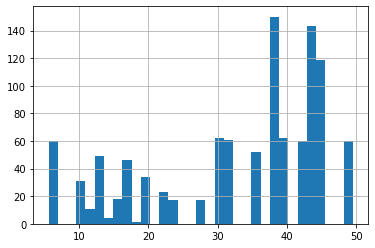

In [15]:
#Cost Price of products
products['Cost Price'].hist(bins=33)

In [16]:
#Cost Price of products
products['Cost Price'].nunique()

33

<AxesSubplot:>

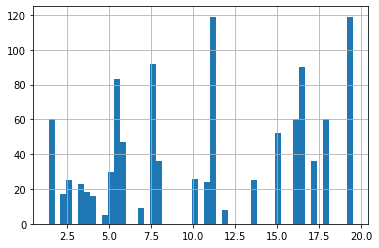

In [17]:
# Profit for every product
products['Profit'].hist(bins=51)

<AxesSubplot:>

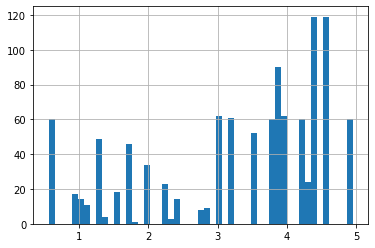

In [18]:
# Holding Cost for every product
products['Holding Cost'].hist(bins=51)

Calculating ratio of Profit vs Holding Cost and let's call it Ratio_PHL 

In [19]:
products['Ratio_PHL'] = products['Profit'] / products['Holding Cost']

In [20]:
products.sort_values(by='Ratio_PHL',ascending=False)

,ProductID,Cost Price,Holding Cost,Profit,Ratio_PHL
540,541,39.865,3.9865,17.085,4.285714
855,856,39.865,3.9865,17.085,4.285714
773,774,42.000,4.2000,18.000,4.285714
774,775,42.000,4.2000,18.000,4.285714
775,776,42.000,4.2000,18.000,4.285714
...,...,...,...,...,...
618,619,49.500,4.9500,5.500,1.111111
619,620,49.500,4.9500,5.500,1.111111
620,621,49.500,4.9500,5.500,1.111111
621,622,49.500,4.9500,5.500,1.111111


Higher Ratio_PHL is better. 

<AxesSubplot:>

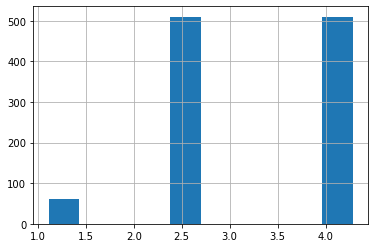

In [21]:
products['Ratio_PHL'].hist()

We can see that there are three classes of products.
We can also calculate the ratio of returns of every product. Which is $\frac{Selling Price}{Cost Price}$.

In [22]:
products['Return Ratio'] = (products['Profit'] + products['Cost Price']) / (products['Holding Cost'] + products['Cost Price'])

In [23]:
products.sort_values(by='Return Ratio',ascending=False)

,ProductID,Cost Price,Holding Cost,Profit,Ratio_PHL,Return Ratio
540,541,39.865,3.9865,17.085,4.285714,1.298701
855,856,39.865,3.9865,17.085,4.285714,1.298701
773,774,42.000,4.2000,18.000,4.285714,1.298701
774,775,42.000,4.2000,18.000,4.285714,1.298701
775,776,42.000,4.2000,18.000,4.285714,1.298701
...,...,...,...,...,...,...
625,626,49.500,4.9500,5.500,1.111111,1.010101
626,627,49.500,4.9500,5.500,1.111111,1.010101
627,628,49.500,4.9500,5.500,1.111111,1.010101
628,629,49.500,4.9500,5.500,1.111111,1.010101


In [24]:
products['Return Ratio'].value_counts()

1.298701    510
1.136364    370
1.136364    140
1.010101     60
Name: Return Ratio, dtype: int64

<AxesSubplot:>

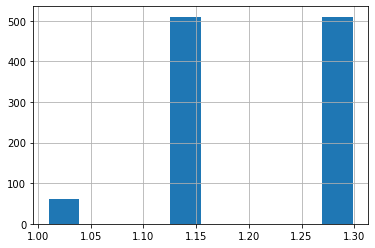

In [25]:
products['Return Ratio'].hist()

Products Classes

1. Class 1 High return product - 510 products - 1.29 Return Ratio 
2. Class 2 Medium return product - 510 products - 1.13 Return Ratio 
3. Class 3 Low return product - 60 products - 1.01 Return Ratio 

In [26]:
class_1 = (products.loc[products['Return Ratio'] > 1.2])['ProductID'].to_list()
class_1

[241,
 242,
 243,
 244,
 245,
 246,
 247,
 248,
 249,
 250,
 251,
 252,
 253,
 254,
 255,
 256,
 257,
 258,
 259,
 260,
 261,
 262,
 263,
 264,
 265,
 266,
 267,
 268,
 269,
 270,
 271,
 272,
 273,
 274,
 275,
 276,
 277,
 278,
 279,
 280,
 281,
 282,
 283,
 284,
 285,
 286,
 287,
 288,
 289,
 290,
 291,
 292,
 293,
 294,
 295,
 296,
 297,
 298,
 299,
 300,
 541,
 542,
 543,
 544,
 545,
 546,
 547,
 548,
 549,
 550,
 551,
 552,
 553,
 554,
 555,
 556,
 557,
 558,
 559,
 560,
 561,
 562,
 563,
 564,
 565,
 566,
 567,
 568,
 569,
 570,
 661,
 662,
 663,
 664,
 665,
 666,
 667,
 668,
 669,
 670,
 671,
 672,
 673,
 674,
 675,
 676,
 677,
 678,
 679,
 680,
 681,
 682,
 683,
 684,
 685,
 686,
 687,
 688,
 689,
 690,
 691,
 692,
 693,
 694,
 695,
 696,
 697,
 698,
 699,
 700,
 701,
 702,
 703,
 704,
 705,
 706,
 707,
 708,
 709,
 710,
 711,
 712,
 713,
 714,
 715,
 716,
 717,
 718,
 719,
 720,
 721,
 722,
 723,
 724,
 725,
 726,
 727,
 728,
 729,
 730,
 731,
 732,
 733,
 734,
 735,
 736,
 737

In [27]:
class_2 = products.loc[(products['Return Ratio'] > 1.1) & (products['Return Ratio'] < 1.2)]['ProductID'].to_list()
class_2

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185

In [28]:
class_3 = products.loc[products['Return Ratio'] < 1.1]['ProductID'].to_list()
class_3

[601,
 602,
 603,
 604,
 605,
 606,
 607,
 608,
 609,
 610,
 611,
 612,
 613,
 614,
 615,
 616,
 617,
 618,
 619,
 620,
 621,
 622,
 623,
 624,
 625,
 626,
 627,
 628,
 629,
 630,
 631,
 632,
 633,
 634,
 635,
 636,
 637,
 638,
 639,
 640,
 641,
 642,
 643,
 644,
 645,
 646,
 647,
 648,
 649,
 650,
 651,
 652,
 653,
 654,
 655,
 656,
 657,
 658,
 659,
 660]

In [29]:
product_with_forecast_set = set(product_with_forecast_list)

class_1_set = set(class_1)
class_2_set = set(class_2)
class_3_set = set(class_3)

In [30]:
forecast_intersection_class_1 = list(product_with_forecast_set.intersection(class_1_set))
forecast_intersection_class_2 = list(product_with_forecast_set.intersection(class_2_set))
forecast_intersection_class_3 = list(product_with_forecast_set.intersection(class_3_set))

In [31]:
print(f'Intersection with class 1\n{forecast_intersection_class_1}\n\n')
print(f'Intersection with class 2\n{forecast_intersection_class_2}\n\n')
print(f'Intersection with class 3\n{forecast_intersection_class_3}')

Intersection with class 1
[665, 668, 543, 671, 545, 674, 547, 677, 549, 551, 680, 553, 555, 562, 563, 564, 565, 566, 695, 567, 698, 701, 704, 707, 710]


Intersection with class 2
[514, 515, 4, 517, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 523, 20, 524, 526, 527, 530, 528, 19, 23, 21, 533, 34, 35, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 518, 50, 49, 519, 53, 51, 520, 521, 575, 62, 577, 578, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 71, 590, 70, 73, 74, 76, 77, 80, 83, 86, 525, 79, 89, 593, 92, 94, 95, 97, 98, 100, 101, 529, 103, 104, 106, 107, 109, 110, 531, 113, 116, 119, 124, 125, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 143, 154, 155, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 173, 64, 65, 574, 522, 67, 68, 589]


Intersection with class 3
[608, 641, 611, 644, 614, 647, 617, 650, 620, 635, 605, 638]


In [39]:
hlp.filter_product_store(product=665, store=14, dataframe=forecast)

# We have forecast for 12 weeks for every product

,ProductID,StoreID,date,fcst
347626,665,14,2023-02-07,0.127797
347622,665,14,2023-04-06,0.133115
347619,665,14,2023-05-14,0.138095
347620,665,14,2023-05-21,0.136727
347621,665,14,2023-05-28,0.134982
347624,665,14,2023-06-18,0.129773
347625,665,14,2023-06-25,0.128698
347618,665,14,2023-07-05,0.138527
347628,665,14,2023-07-16,0.126160
347629,665,14,2023-07-23,0.125847


In [54]:
prods = [665, 668, 543,514, 515, 4,517,608, 641, 611]
prod_store = {}

In [55]:
for i in prods:
    prod_store[i] = hlp.filter_product(product=i,dataframe=forecast)['StoreID'].unique()

In [56]:
prod_store

{665: array([ 73, 315, 829, 165, 100, 701, 907,  14, 913, 118, 104,  47],
       dtype=int64),
 668: array([ 73, 315, 829, 165, 100, 701, 907,  14, 913, 118, 104,  47],
       dtype=int64),
 543: array([506, 837, 130, 149, 829, 165, 808, 315, 320, 801, 352, 118, 770,
        380, 753, 477, 749, 497, 727, 535, 726, 701, 709, 360, 841, 715,
        104,  14,  53, 913, 916, 910, 100,  73,  22,  47, 907], dtype=int64),
 514: array([715, 497, 726, 100, 808, 535, 753, 118, 701,  47, 829, 315, 506,
        380, 727, 910, 104, 716, 516, 913,  53, 709,  73, 477, 801,  14,
         22, 770, 149, 837, 320, 841, 352, 749, 907, 130, 360, 916, 165],
       dtype=int64),
 515: array([ 806,   54,  875,  468,  452,  447,  939,  881,   68,  414,  402,
         380,  882,  376,  374,   69,  471,  360,  477,  497,   43,  607,
         962,  606,  848,  605,  577,   47,  558,  535,  857,  525,  516,
          53,  868,  488,  625,  352,  335,  911,  153,  149,   94,  148,
         913,  142,  140,  130,   

Three classes are found again

In [33]:
products.loc[products['ProductID'] == 3]['Cost Price'].values[0]

44.0

In [34]:
def procurement_cost(ProductID:int):

    cost = products.loc[products['ProductID'] == ProductID]['Cost Price'].values[0] + \
    products.loc[products['ProductID'] == ProductID]['Holding Cost'].values[0]

    return cost

In [35]:
capital = 0

for i in product_with_forecast_list:
    capital += procurement_cost(i)

print(f'Capital if every product is held for a week: {capital}')

Capital if every product is held for a week: 7796.436999999999


In [36]:
sales_130 = hlp.filter_product(product=130,dataframe=sales)

In [37]:
sales_130['qty'].sum()

6139

In [38]:
products.iloc[129]

ProductID       130.000000
Cost Price       44.000000
Holding Cost      4.400000
Profit           11.000000
Ratio_PHL         2.500000
Return Ratio      1.136364
Name: 129, dtype: float64